# Online Retail Analysis
[UCI Data source](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II#)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/retail_data.csv')

### Loading and Cleaning the Data

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


We can see that column names are capitalized , so it will become a nightmare for analyst and more error prone. 

Next I will be rename the columns to my own naming convention.

In [5]:
new_col_names = {
    "Invoice" : "invoice",
    "StockCode": "stockcode",
    "Quantity" : "quantity",
    "InvoiceDate" : "date",
    "Price" : "unit_price",
    "Country" : "country",
    "Description" : "desc",
    "Customer ID" : "customer_id",
}

data.rename(columns=new_col_names, inplace=True)

data.head()

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [6]:
data.describe()

,quantity,unit_price,customer_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [7]:
data.shape

(525461, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      525461 non-null  object 
 1   stockcode    525461 non-null  object 
 2   desc         522533 non-null  object 
 3   quantity     525461 non-null  int64  
 4   date         525461 non-null  object 
 5   unit_price   525461 non-null  float64
 6   customer_id  417534 non-null  float64
 7   country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


- From shape of the dataframe we can see that there are total 525461 entries. But from info we see that some of the entries are missing in desc and customer_id column.

- That means there are missing values as we have to investigate further.



In [9]:
# checking missing values presents in Data

data.isnull().sum().sort_values(ascending=False)

customer_id    107927
desc             2928
invoice             0
stockcode           0
quantity            0
date                0
unit_price          0
country             0
dtype: int64

So most of the missing values are in customer_id column.

In [12]:
data.describe()

,quantity,unit_price,customer_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [13]:
# .loc() function to determine how many instances in retail have 25111.09 as their unit price.

data.loc[data['unit_price'] == 25111.0900000]

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
241824,C512770,M,Manual,-1,17/06/2010 16:52,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,17/06/2010 16:53,25111.09,NaN,United Kingdom


there are only two instances where unit_price is 25111.09

In [14]:
data.loc[data['unit_price'] == -53594.360000]

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


- These extreme negative values are outlier.|

In [15]:
# Calculate to total number of instance that have negative unit_price values.

(data['unit_price'] <= 0).sum()

3690

In [17]:
# percentage of negative unit_price values
((data['unit_price'] <= 0).sum()) / data.shape[0] * 100

0.7022405088103589

The total percentage of negative unit_price is 0.7%.

In [18]:
# Calculate to total number of instance that have negative quantity values.
(data['quantity'] <= 0).sum()

12326

In [19]:
# percentage of negative quantity values
((data['quantity'] <= 0).sum()) / data.shape[0] * 100

2.3457497321399687

The percentage of negative quantity is 2.34%

In [21]:
# how many instances in retail have a unit_price and quantity that are both negative?
((data['unit_price'] <=0) & (data['quantity'] <= 0) & (data['customer_id'].isnull())).sum()

2121

In [23]:
# percentage of instances with negative unit_price and quantity and missing customer_id

(((data['unit_price'] <=0) & (data['quantity'] <= 0) & (data['customer_id'].isnull())).sum()) / data.shape[0] * 100

0.4036455607552226

In [24]:
# store the data with missing values in a dataframe called null_data
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
263,489464,21733,85123a mixed,-96,01/12/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,01/12/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01/12/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,01/12/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,01/12/2009 11:49,0.55,NaN,United Kingdom


In [25]:
# drop the row with missing values
new_retail = data.dropna()

In [26]:
new_retail = new_retail[(new_retail['unit_price'] > 0) & (new_retail['quantity'] > 0)]

In [27]:
new_retail.describe()

,quantity,unit_price,customer_id
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


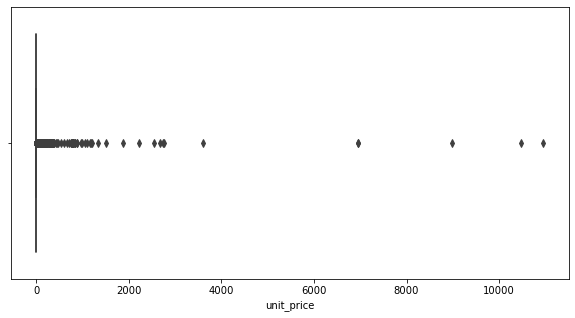

In [30]:
plt.subplots(figsize= (10,5))
up = sns.boxplot(new_retail.unit_price)

In [31]:
new_retail = new_retail[new_retail.unit_price < 6000]
new_retail.describe()

,quantity,unit_price,customer_id
count,407659.000000,407659.000000,407659.000000
mean,13.585740,3.185750,15368.593562
std,96.841331,14.494341,1679.761725
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,3610.500000,18287.000000


D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


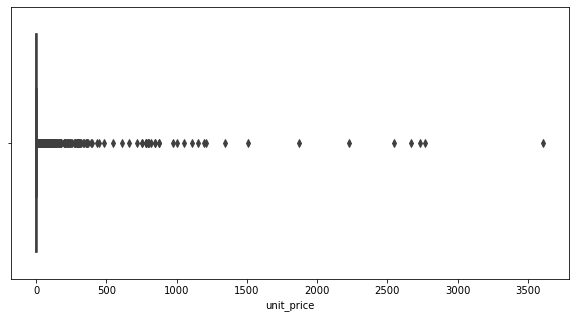

In [33]:
plt.subplots(figsize= (10,5))
up_new = sns.boxplot(new_retail.unit_price)
plt.show()

D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


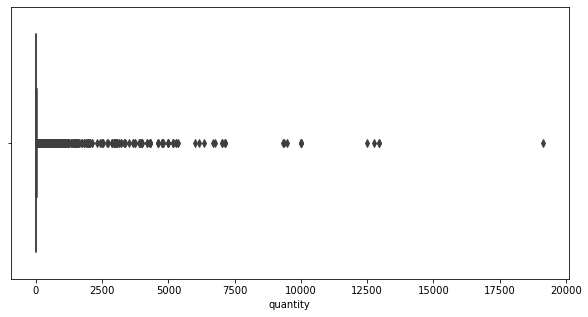

In [34]:
plt.subplots(figsize= (10,5))
up_new = sns.boxplot(new_retail.quantity)
plt.show()

In [35]:
new_retail = new_retail[new_retail.quantity < 15000]
new_retail.describe()

,quantity,unit_price,customer_id
count,407658.000000,407658.000000,407658.000000
mean,13.538792,3.185757,15368.597160
std,92.085647,14.494358,1679.762214
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,12960.000000,3610.500000,18287.000000


D:\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


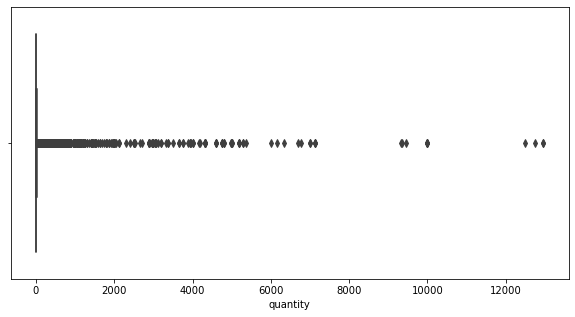

In [37]:
plt.subplots(figsize= (10,5))
q_new = sns.boxplot(new_retail.quantity)
plt.show()

In [38]:
new_retail[(new_retail.desc.isnull()) & (new_retail.customer_id.isnull())]
new_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407658 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoice      407658 non-null  object 
 1   stockcode    407658 non-null  object 
 2   desc         407658 non-null  object 
 3   quantity     407658 non-null  int64  
 4   date         407658 non-null  object 
 5   unit_price   407658 non-null  float64
 6   customer_id  407658 non-null  float64
 7   country      407658 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ MB


In [39]:
retail = new_retail
retail.head()

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


## Preparing the data

In [40]:
data.desc = data.desc.str.lower()
data.head()

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [42]:
data['date'] = pd.to_datetime(data.date, format='%d/%m/%Y %H:%M')

In [43]:
data.head()

,invoice,stockcode,desc,quantity,date,unit_price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [44]:
data.insert(loc = 4, column = 'year_month', value = data.date.map(lambda x: x.year * 100 + x.month))

In [45]:
data.head()

,invoice,stockcode,desc,quantity,year_month,date,unit_price,customer_id,country
0,489434,85048,15cm christmas glass ball 20 lights,12,200912,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,pink cherry lights,12,200912,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,white cherry lights,12,200912,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"record frame 7"" single size",48,200912,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,strawberry ceramic trinket box,24,200912,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.insert(loc = 5, column = 'year', value = data.date.dt.year)